# Foundations of AI & ML
## Session 05
### Experiment 2 - Part 3
## LOGISTIC REGRESSION

**Objectives:** This Experiment shows how to derive Conclusions from the DataSet after applying Logistic Regression. We have taken a sample data showing the relation between number of Hours Spent studying and Pass/ Fail status. We will plot a graph showing Probability of passing the exam vs Hours of Studying.

**Expected Time:** This Experiment should take around 15 mins

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Reading  the data

In [2]:
data = pd.read_csv('Hours.csv', header=0,  names=['Hours', 'Pass'])
data

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [3]:
x = data['Hours'].values
y = data['Pass'].values
print(len(x), x)
print(len(y), y)

20 [ 0.5   0.75  1.    1.25  1.5   1.75  1.75  2.    2.25  2.5   2.75  3.
  3.25  3.5   4.    4.25  4.5   4.75  5.    5.5 ]
20 [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]


### Now let us calculate the logistic function

In [4]:
def logf(a, b, x):
    return 1.0 / (1.0 + np.exp(-a * x - b))

def dlogf(a, b, x):
    return logf(a, b, x) * (1 - logf(a, b, x))
##
## The derivative of the logistic function is f * (1 - f)
##
def one_step(x, y, a, b, eta):
    ycalc = logf(a, b, x)
    delta_a = sum((y - ycalc) * ycalc * (1 - ycalc) * x)
    delta_b = sum((y - ycalc) * ycalc * (1 - ycalc))
    a = a + delta_a * eta
    b = b + delta_b * eta
    error = sum((y - ycalc)**2)
    return a, b, error

### $eta$ = 0.001

In [6]:
a, b = 1, 1
eta = 0.001
for times in range(100000):
    a, b, error = one_step(x, y, a, b, eta)
    if times % 1000 == 0:
        eta = max(0.00001, eta * 0.99)
        if times % 5000 == 0:
            print(a, b, error)

0.999245047505 0.999389032719 8.52388950718
0.617913952055 -1.49798441565 3.0849571055
0.857584387911 -2.2513911088 2.79787087538
0.972873726092 -2.60670512553 2.73255205452
1.03963986911 -2.81109211086 2.71003370568
1.08217356793 -2.9408902089 2.70052422046
1.11089006731 -3.02837365061 2.69599241593
1.13106258431 -3.0897654382 2.69364920593
1.14565532934 -3.13414696414 2.69236284151
1.15645752742 -3.16698560418 2.6916228694
1.16460607027 -3.19174945635 2.69118064639
1.17085188366 -3.21072655349 2.69090770144
1.17570623937 -3.22547343108 2.69073445572
1.17952588434 -3.23707553389 2.69062173342
1.18256486932 -3.24630549844 2.69054673854
1.18500727577 -3.25372297769 2.6904958223
1.18698850829 -3.25973952855 2.69046060431
1.18860949776 -3.26466186445 2.69043582157
1.1899463782 -3.26872130787 2.69041810063
1.19105720097 -3.27209421713 2.69040523833


### We will plot data and observe how logistic regression work

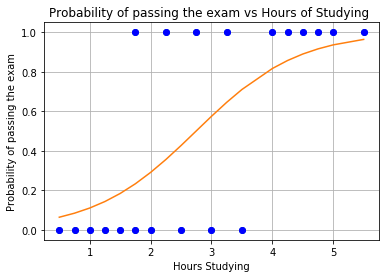

In [7]:
import matplotlib.pyplot as plt
plt.plot(data.Hours, data.Pass, "o")
plt.xlabel("Hours Studying")
plt.ylabel("Probability of passing the exam")
plt.title("Probability of passing the exam vs Hours of Studying ")

ycalc = logf(a, b, x)
plt.plot(x, ycalc)
plt.plot(x, y, "bo")
plt.grid(True)
plt.show()